In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload  as r
import auxiliaryDataFunctions as dataplot
r(dataplot)

<module 'auxiliaryDataFunctions' from '/home/sebas/GitHub/Masterscriptie/current/finalExperiments/python/auxiliaryDataFunctions.py'>

In [23]:
r(dataplot)
folderName = "forAccuracy"
folderPath = "../data/graphs/" + folderName + "/"
graphDF =  dataplot.loadGraphsAsDF(folderPath)
graphDF.head()

[7, 9, 29]
nrEdges: 32
totalPossibleEdges: 324
[5, 31, 9]
nrEdges: 43
totalPossibleEdges: 434
[5, 15, 25]
nrEdges: 45
totalPossibleEdges: 450
[14, 19, 12]
nrEdges: 49
totalPossibleEdges: 494
[7, 7, 31]
nrEdges: 266
totalPossibleEdges: 266
[9, 14, 22]
nrEdges: 434
totalPossibleEdges: 434
[24, 9, 12]
nrEdges: 324
totalPossibleEdges: 324
[21, 17, 7]
nrEdges: 476
totalPossibleEdges: 476
[31, 5, 9]
nrEdges: 60
totalPossibleEdges: 200
[12, 7, 26]
nrEdges: 79
totalPossibleEdges: 266
[10, 8, 27]
nrEdges: 88
totalPossibleEdges: 296
[7, 22, 16]
nrEdges: 151
totalPossibleEdges: 506
[8, 14, 23]
nrEdges: 173
totalPossibleEdges: 434
[23, 14, 8]
nrEdges: 173
totalPossibleEdges: 434
[6, 28, 11]
nrEdges: 190
totalPossibleEdges: 476
[11, 20, 14]
nrEdges: 200
totalPossibleEdges: 500
[21, 9, 15]
nrEdges: 162
totalPossibleEdges: 324
[14, 25, 6]
nrEdges: 250
totalPossibleEdges: 500
[27, 9, 9]
nrEdges: 162
totalPossibleEdges: 324
[14, 17, 14]
nrEdges: 238
totalPossibleEdges: 476
[18, 6, 21]
nrEdges: 140
tota

,nrVerts,nrLayers,nrEdges,ratioEdges,totalWeight,ratioNonZeroWeights
0,45,3,32,0.098765,5925,0.244444
1,45,3,43,0.099078,6936,0.333333
2,45,3,45,0.100000,13948,0.622222
3,45,3,49,0.099190,20390,0.844444
4,45,3,266,1.000000,6026,0.200000


In [24]:

gurDFUni = pd.read_csv("../data/results/"+ folderName + "/" + "altGurobiUni.txt")
gurDFBi = pd.read_csv("../data/results/"+ folderName + "/" + "altGurobiUni.txt")
gurDFUni.head()

,index,nrLayers,nrNodes,nrEdges,objectiveValue,timeElapsed,solvedToCompletion
0,0,3,45,32,406.667,0.386513,1
1,1,3,45,43,235.364,0.009229,1
2,2,3,45,45,341.000,0.011260,1
3,3,3,45,49,642.500,0.017084,1
4,4,3,45,266,263.818,0.021215,1


In [46]:
print((graphDF.index == gurDFBi.index).all())


True


Weird index: 25
Weird index: 38
Weird index: 266
Weird index: 290
Weird index: 410
Weird index: 530
Weird index: 538
Weird index: 555
Weird index: 649
Weird index: 674
Weird index: 675
Weird index: 722
Weird index: 747
Weird index: 792
Weird index: 794
Weird index: 806
Weird index: 818
Weird index: 843
Weird index: 888
Weird index: 889
Weird index: 913
Weird index: 914
Weird index: 939
Weird index: 962
Weird index: 1011
Weird index: 1035
Weird index: 1067
Weird index: 1082
Weird index: 1139
Weird index: 1153
Weird index: 1155
Weird index: 1178
Weird index: 1179
Weird index: 1201
Weird index: 1202
Weird index: 1227
Weird index: 1239
Weird index: 1272
Weird index: 1275
Weird index: 1328
Weird index: 1335
Weird index: 1355
Weird index: 1370
Weird index: 1371
Weird index: 1419
Weird index: 1435
Weird index: 1443
Weird index: 1467
Weird index: 1491
Weird index: 1512
Weird index: 1539
0       False
1       False
2       False
3       False
4       False
        ...  
1577    False
1578    Fa

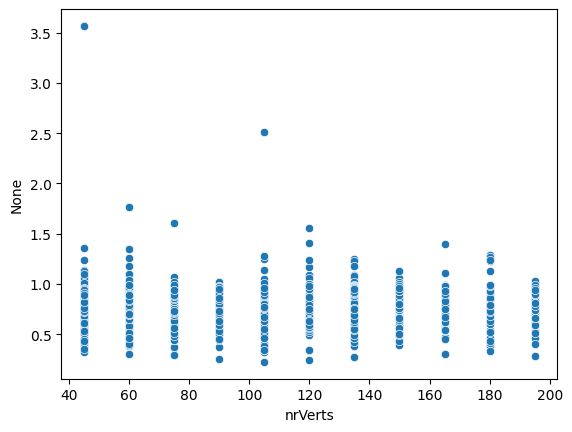

In [50]:
#maskOpt = (gurDFBi["solvedToCompletion"] == 1) & (graphDF["ratioEdges"]<0.90) & (gurDFBi["objectiveValue"]>0.000001)
maskOpt = (gurDFBi["solvedToCompletion"] == 1) & (gurDFBi["objectiveValue"]>0.000001)

x = graphDF.loc[maskOpt,"nrVerts"]

num = (graphDF.loc[maskOpt,"totalWeight"]/graphDF.loc[maskOpt,"nrVerts"])
den = gurDFBi.loc[maskOpt,"objectiveValue"]

y = num/den
sns.scatterplot(x=x, y=y)


mask = y>1
for i in range(len(maskOpt)):
    if maskOpt.loc[i]==True:
        if y[i]>1:
            print( "Weird index:", i)
print(mask)


In [52]:
graphDF.loc[25]

nrVerts                   60.000000
nrLayers                   3.000000
nrEdges                   75.000000
ratioEdges                 0.099206
totalWeight            13716.000000
ratioNonZeroWeights        0.450000
Name: 25, dtype: float64